# Part I - (Ford go bike)
## by Moudhi AlFalah

## Introduction
> this data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [8]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
df['user_type'].value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### Cleaning Data

In [10]:
df_clean = df.copy()

In [11]:
#change the datatype 


#convert to category
df_clean.user_type = df_clean.user_type.astype('category') 

#conver to bool
df_clean.bike_share_for_all_trip = (df_clean.bike_share_for_all_trip == 'Yes') 


df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null bool
dtypes: bool(1), category(1), float64(7), int64(2), object(5)
memory usage: 19.9+ MB

In [12]:
#drop the column that we dont need
df_clean.drop(columns=['start_station_latitude','start_station_longitude','end_station_latitude', 'end_station_longitude'], axis=1,inplace=True)

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null bool
dtypes: bool(1), category(1), float64(3), int64(2), object(5)
memory usage: 14.3+ MB


In [14]:
df_clean.insert(1,'duration_min', df_clean.duration_sec/60)
df_clean.insert(2,'duration_hours', df_clean.duration_min/60)
df_clean.insert(3,'duration_days', df_clean.duration_hours/24)

In [15]:
df_clean[['start_time', 'end_time']] = df_clean[['start_time', 'end_time']].apply(pd.to_datetime)

In [16]:
df_clean.insert(4,'start_day', df_clean['start_time'].dt.day_name() )
df_clean.insert(5,'end_day', df_clean['end_time'].dt.day_name() )

In [17]:
df_clean.head()

duration_sec  duration_min  duration_hours  duration_days start_day  \
0         52185    869.750000       14.495833       0.603993  Thursday   
1         42521    708.683333       11.811389       0.492141  Thursday   
2         61854   1030.900000       17.181667       0.715903  Thursday   
3         36490    608.166667       10.136111       0.422338  Thursday   
4          1585     26.416667        0.440278       0.018345  Thursday   

  end_day              start_time                end_time  start_station_id  \
0  Friday 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975              21.0   
1  Friday 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056              23.0   
2  Friday 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146              86.0   
3  Friday 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842             375.0   
4  Friday 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074               7.0   

                                 start_station_name  end_station_id  \
0  Montgomery St BART Station (Market St at 2nd St)            13.0   
1                     The Embarcadero at Steuart St            81.0   
2                           Market St at Dolores St             3.0   
3                           Grove St at Masonic Ave            70.0   
4                               Frank H Ogawa Plaza           222.0   

                               end_station_name  bike_id   user_type  \
0                Commercial St at Montgomery St     4902    Customer   
1                            Berry St at 4th St     2535    Customer   
2  Powell St BART Station (Market St at 4th St)     5905    Customer   
3                        Central Ave at Fell St     6638  Subscriber   
4                         10th Ave at E 15th St     4898  Subscriber   

   member_birth_year member_gender  bike_share_for_all_trip  
0             1984.0          Male                    False  
1                NaN           NaN                    False  
2             1972.0          Male                    False  
3             1989.0         Other                    False  
4             1974.0          Male                     True

In [18]:
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [19]:
df_clean.describe()

duration_sec   duration_min  duration_hours  duration_days  \
count  183412.000000  183412.000000   183412.000000  183412.000000   
mean      726.078435      12.101307        0.201688       0.008404   
std      1794.389780      29.906496        0.498442       0.020768   
min        61.000000       1.016667        0.016944       0.000706   
25%       325.000000       5.416667        0.090278       0.003762   
50%       514.000000       8.566667        0.142778       0.005949   
75%       796.000000      13.266667        0.221111       0.009213   
max     85444.000000    1424.066667       23.734444       0.988935   

       start_station_id  end_station_id        bike_id  member_birth_year  \
count     183215.000000   183215.000000  183412.000000      175147.000000   
mean         138.590427      136.249123    4472.906375        1984.806437   
std          111.778864      111.515131    1664.383394          10.116689   
min            3.000000        3.000000      11.000000        1878.000000   
25%           47.000000       44.000000    3777.000000        1980.000000   
50%          104.000000      100.000000    4958.000000        1987.000000   
75%          239.000000      235.000000    5502.000000        1992.000000   
max          398.000000      398.000000    6645.000000        2001.000000   

          member_age  
count  175147.000000  
mean       34.193563  
std        10.116689  
min        18.000000  
25%        27.000000  
50%        32.000000  
75%        39.000000  
max       141.000000

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
duration_min               183412 non-null float64
duration_hours             183412 non-null float64
duration_days              183412 non-null float64
start_day                  183412 non-null object
end_day                    183412 non-null object
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null category
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null bool
member_age         

### What is the structure of your dataset?


> there are 183215 data of trip with 17 features: duration_sec, duration_hours, duration_days, start_day, end_day, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip and member_age.



### What is/are the main feature(s) of interest in your dataset?


> the main feature is the sec_duration


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> member_gender, member_age and user_type

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


### The Distribution of Trip Durations

In [21]:
df_clean.to_csv('clean_file.csv', index=False)

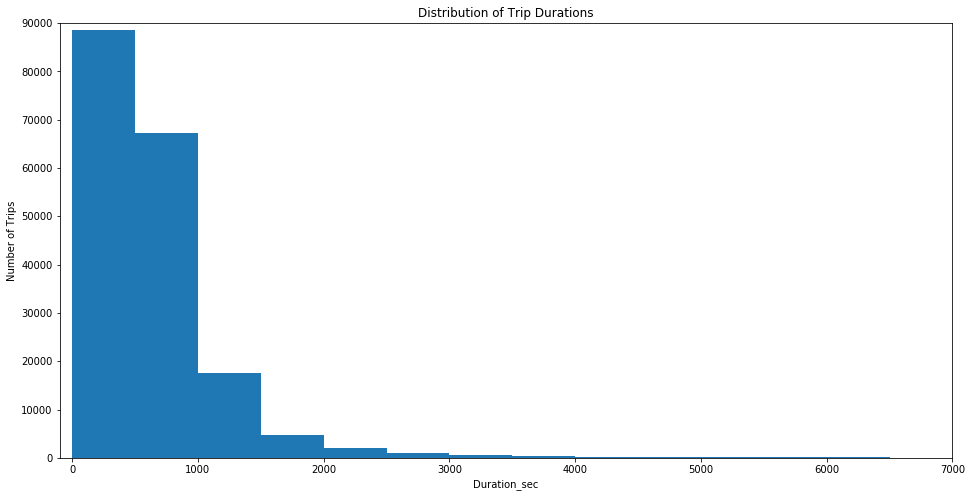

In [22]:
binsize = 500
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[16, 8])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.axis([-100, 7000, 0, 90000])
plt.show()

the most of trips are take sec_duration between (0,1000) second. but, its not clear.

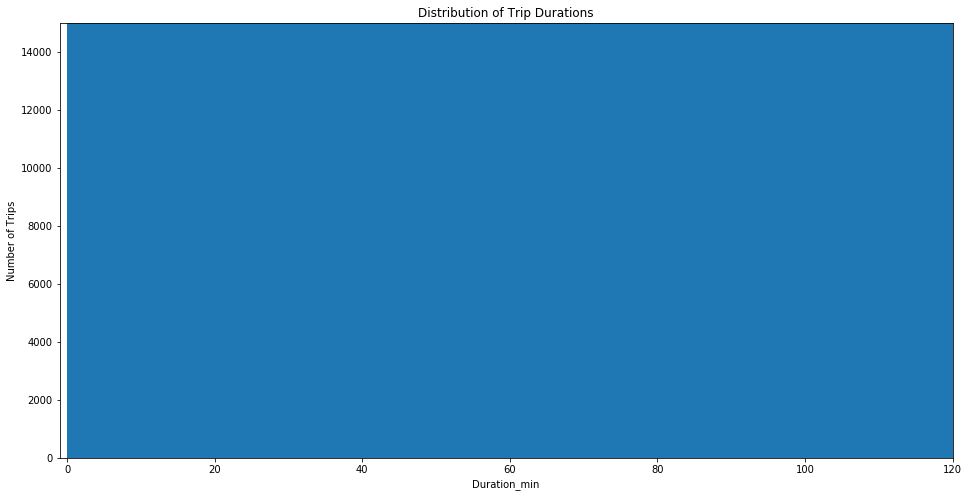

In [23]:
#try to do the same previous code but with minutes to make it more clear.
bins = np.arange(0, df_clean['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[16, 8])
plt.hist(data = df_clean, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_min')
plt.ylabel('Number of Trips')
plt.axis([-1, 120, 0, 15000])
plt.show()

its more clear than sec_duration, the most trips are take 2 min to 18 min 

### The Distribution of User Age

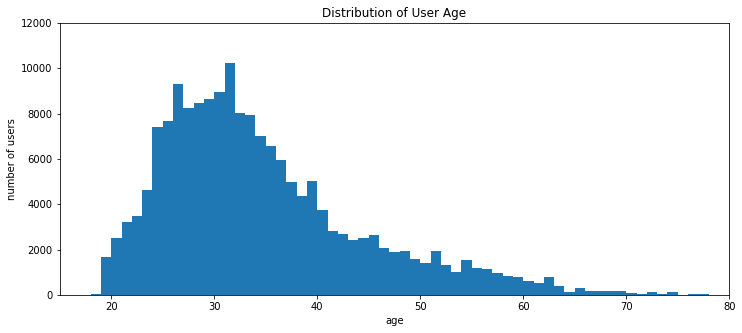

In [24]:
# Plotting age distribution

def plot_x(data, x, x_label, y_label, title, binsize):
    bins = np.arange(0, df_clean['member_age'].max()+binsize, binsize)

    plt.figure(figsize=[12, 5])
    plt.hist(data = df_clean.dropna(), x = 'member_age', bins = bins)
    plt.axis([15, 80, 0, 12000])

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

plot_x(data = df_clean, x= "member_age", x_label = "age", y_label = "number of users", title = "Distribution of User Age", binsize=1)

The most age of users are between 25 and 35 years old

### The Distribution of User Type

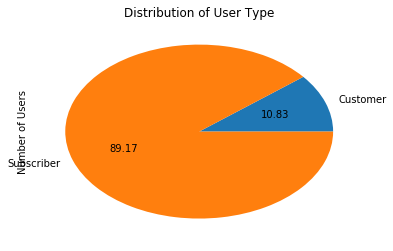

In [25]:
# plotting types of users 
df.groupby('user_type').size().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of User Type')
plt.ylabel('Number of Users');

Subscriber user are more than Customer user

### The Distribution of Gender

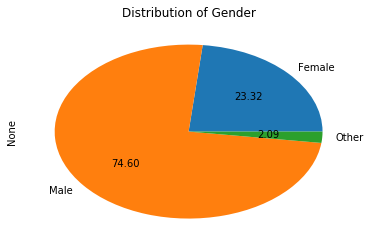

In [26]:
#plotting of gender
df.groupby('member_gender').size().plot(kind='pie', autopct='%.2f')
plt.title('Distribution of Gender');

Male are more than Female.

### The Number of Trips Everyday 

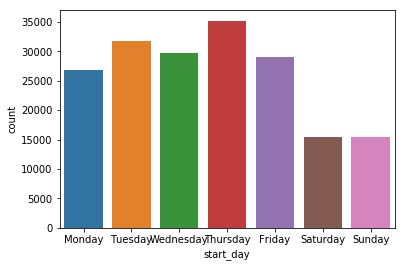

In [27]:
sb.countplot(data = df_clean, x = 'start_day', order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]);

most trips start on thursday

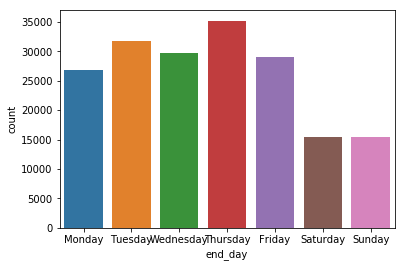

In [28]:
sb.countplot(data = df_clean, x = 'end_day', order = ['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]);

most trips end on thursday

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> most trips are take trip duration between a (0, 1000) second.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> we insert a new columns (start_day and end_day) to see if the most trips will be on weekdays or weekends.
and insert a new column (member_age) to see the age of most trips of ford go bike.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### The Correlation between the Numeric Variables

In [29]:
numeric_vars = ['duration_sec', 'member_birth_year', 'member_age', 'duration_hours', 'duration_days']

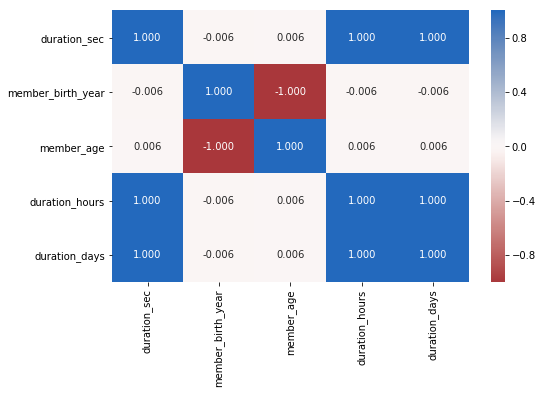

In [30]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show();

there is no correlations between numeric variables

### Tripe Duration and Age

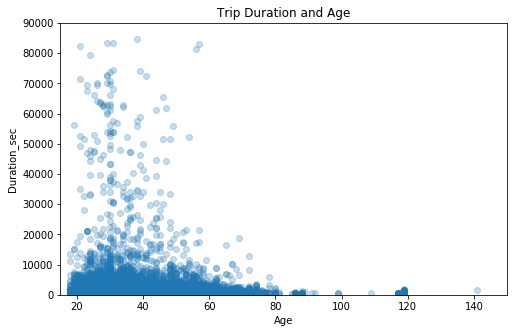

In [31]:
#relationship between Durarion and Age 
plt.figure(figsize=[8,5])
plt.scatter(df_clean['member_age'], df_clean['duration_sec'], alpha = 0.25)
plt.axis([15, 150, 0, 90000])
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duration_sec')
plt.show()

the users who there age are between 18 and 30 are take longer duration than oldest year

### Trip Duration and Gender

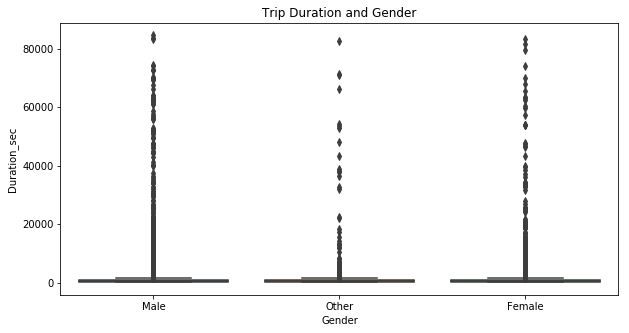

In [32]:
#relationship between Trip durarion and Gender 

plt.figure(figsize = [10, 5])
sb.boxplot(data = df_clean, x = 'member_gender', y = 'duration_sec')
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

its not a clear so we want to try to make it clear 

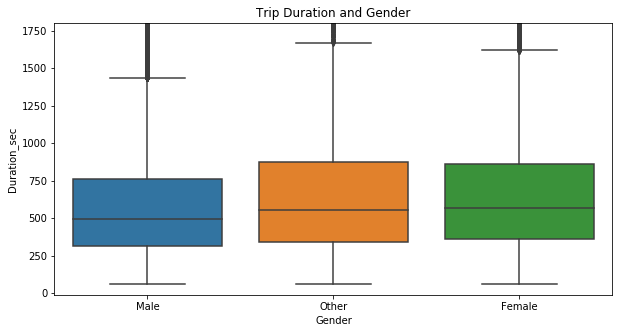

In [33]:
#relationship between Trip durarion and Gender 

plt.figure(figsize = [10, 5])
sb.boxplot(data = df_clean, x = 'member_gender', y = 'duration_sec')
plt.ylim([-10, 1800])
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_sec')
plt.show()

its clean, and we can say the females and others has a higher precentage on trip duration than males

### Trip Duration and User Type

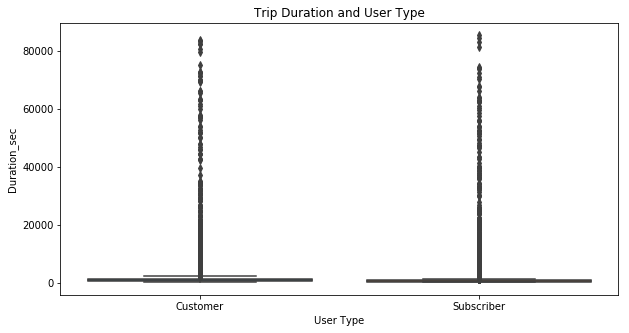

In [34]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = df_clean, x = 'user_type', y = 'duration_sec')
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

also its not a clean..

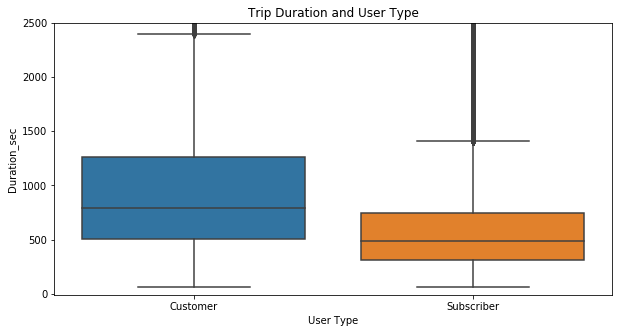

In [35]:
plt.figure(figsize = [10, 5])
sb.boxplot(data = df_clean, x = 'user_type', y = 'duration_sec')
plt.ylim([-10, 2500])
plt.title('Trip Duration and User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

good, customers has a higher precentage on duration than subscriber

### What is the  Correlation between each variable in the dataset?

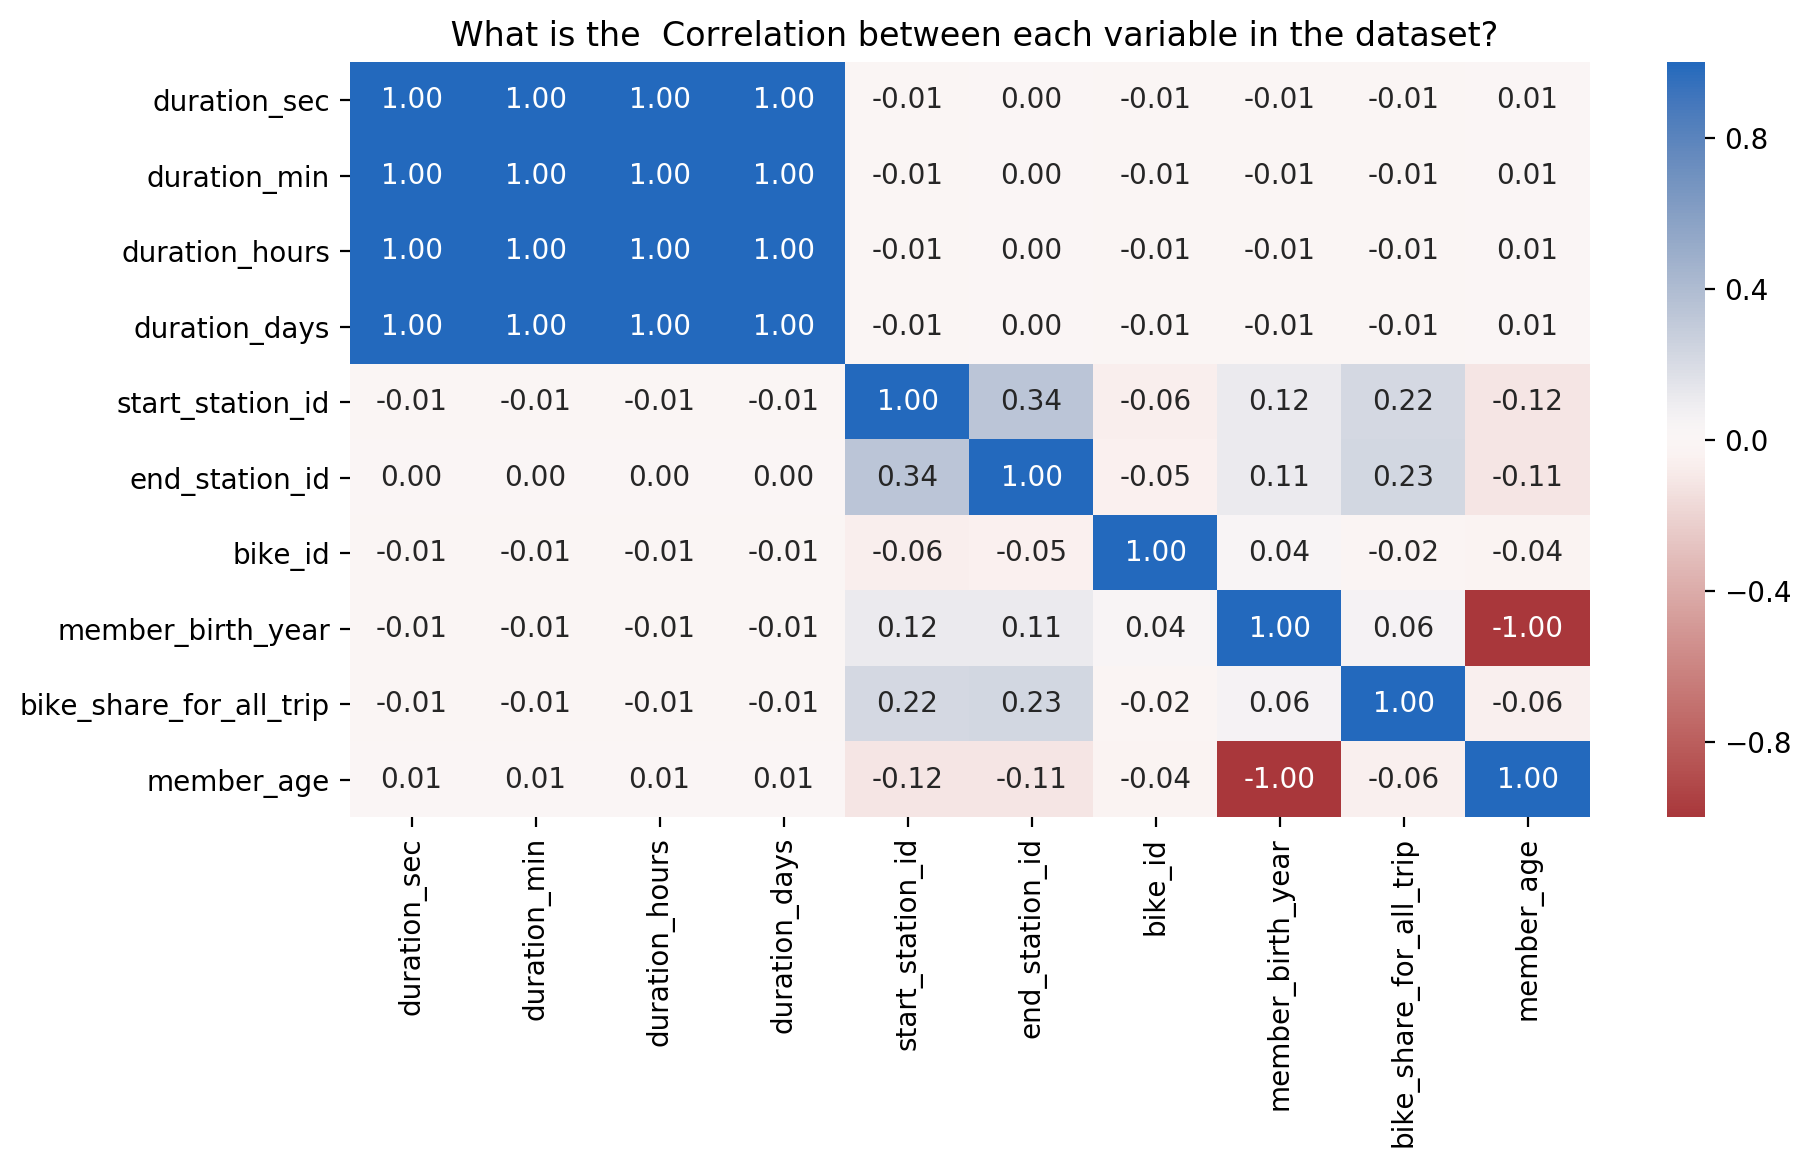

In [36]:
plt.figure(figsize = (10,5), dpi = 200)



sb.heatmap(df_clean.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

plt.title(" What is the  Correlation between each variable in the dataset?")


plt.xticks(rotation = 90)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



plt.show()

there is a correlation between start_station_id and end_station_id, and there is a weak correlation between start_station_id and end_station_id with member_birth_year.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

trip duration is dependent on age, the age between 20 and 40 has a higher duration than other age



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

the customers has a higher trip duration than subscribers where the customers are more than subscribers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### User type vs Gender vs Trip Duration

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


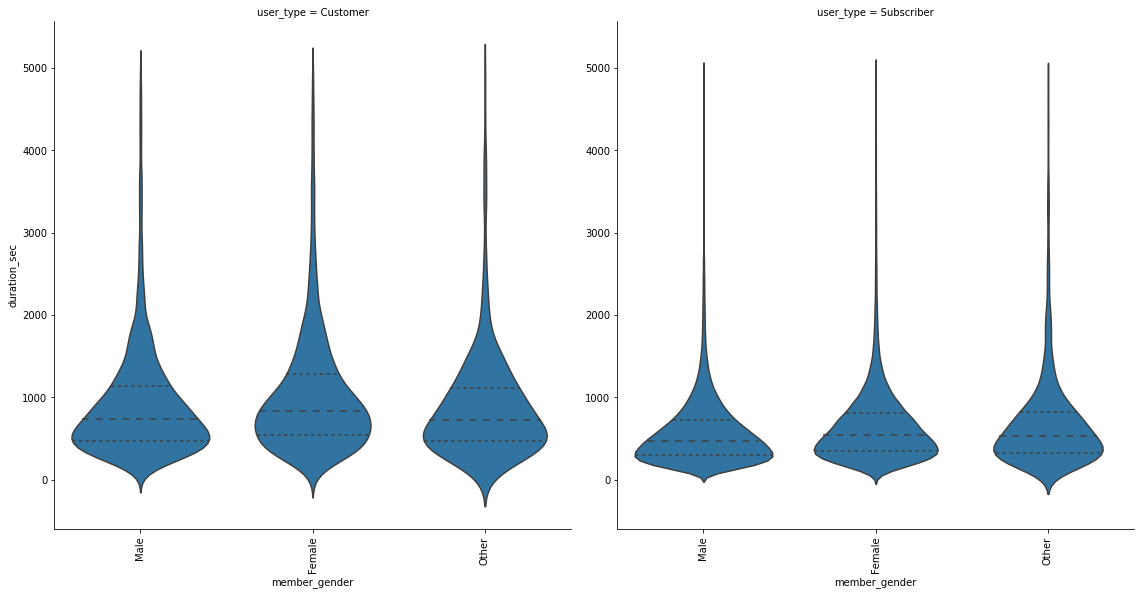

In [37]:
# user_type vs member_gender vs duration_sec 
trimmed_duration_df = df_clean[df_clean.duration_sec <= 5000]

g = sb.FacetGrid(data = trimmed_duration_df, col = 'user_type', size=8);
g.map(sb.violinplot, 'member_gender', 'duration_sec', inner = 'quartile');
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

the users in customer has higher second duration than subscriber with male, female and other.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>the users in subscriber has less second duration with more males than female and unknown.
the users in customer has higher second duration than subscriber.  



### Were there any interesting or surprising interactions between features?

> i didn't find any interesting interaction on this section

## Conclusions
> Most users are male, subscriber.
>The female distribution depending on their age more than male


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

